In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

5.419892487169179 -2.5285108217670995
20.5015211120526 55.869352904520895
33.18026713150434 98.62718559731252
-44.22288259049043 -132.14855810950098
0.7539140830687927 61.377783929317786
-78.45880312040768 -176.1030203859132
-8.043822481178537 110.34322978872126
17.65694254283389 161.7611338360843
34.61829558097455 151.04513343227205
52.43728567493906 -159.5465120738595
63.380178280340346 126.28542352533009
82.34136901531073 -177.65567151899415
-57.106019274965114 176.52612701170062
35.85573322965429 -90.29886479297743
23.08416767097387 -143.26811243323544
-71.5328530902174 103.07522492372726
-21.546044886467385 -98.83557957330899
-78.10696957394734 164.93184827979206
5.3907576225744975 108.70628704731371
50.30770478214538 -176.1162116379763
-7.541618509338008 -138.96067882552973
66.29042978270246 -34.571094740927435
-35.536166541747164 -121.7128584815947
-17.443529245366975 -152.84034468557218
-3.7292010069248676 -134.07138306197794
0.07802410867283527 -147.59389631582303
-29.30097035

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

prestea gh
nizwa om
xining cn
rikitea pf
victoria sc
vaini to
bambanglipuro id
butaritari ki
hasaki jp
bethel us
sangar ru
mys shmidta ru
kaitangata nz
paragould us
hilo us
albany au
puerto ayora ec
bluff nz
kuching my
provideniya ru
atuona pf
tasiilaq gl
rikitea pf
vaitape pf
atuona pf
atuona pf
lebu cl
amapa br
taolanaro mg
portland au
kununurra au
palabuhanratu id
codrington ag
atuona pf
upernavik gl
aksarka ru
provideniya ru
yellowknife ca
ushuaia ar
nishihara jp
nome us
wadena ca
bredasdorp za
alyangula au
maceio br
thompson ca
port alfred za
georgetown sh
new norfolk au
sorong id
port alfred za
bredasdorp za
nyurba ru
trelew ar
nikolskoye ru
hobart au
tateyama jp
manzhouli cn
yellowknife ca
ushuaia ar
castro cl
thompson ca
pemangkat id
flin flon ca
illoqqortoormiut gl
padang id
sibolga id
saint-augustin ca
meulaboh id
ushuaia ar
codrington ag
kampot kh
hohhot cn
yellowknife ca
port macquarie au
mataura pf
bredasdorp za
srednekolymsk ru
parati br
kangaatsiaq gl
victoria sc
busselt

hermanus za
georgetown sh
nalut ly
mataura pf
busselton au
henties bay na
carbondale us
butaritari ki
husavik is
iqaluit ca
belushya guba ru
jurm af
illoqqortoormiut gl
dikson ru
kamen-na-obi ru
vaini to
east london za
ilulissat gl
busselton au
prince george ca
bredasdorp za
hanna ca
busselton au
saint-philippe re
kinsale ie
faanui pf
taolanaro mg
hobart au
yulara au
nikolskoye ru
port alfred za
chiredzi zw
port alfred za
fraserburgh gb
samusu ws
belushya guba ru
mount isa au
ikauna in
busselton au
srandakan id
abu kamal sy
payo ph
carnarvon au
bluff nz
albany au
mildura au
mataura pf
panzhihua cn
high level ca
rikitea pf
harper lr
magistralnyy ru
atuona pf
rikitea pf
amderma ru
dikson ru
husavik is
mataura pf
vila franca do campo pt
puerto ayora ec
sayyan ye
rikitea pf
qaanaaq gl
sao jose da coroa grande br
baykit ru
hobart au
cape town za
sokolo ml
qaanaaq gl
coahuayana mx
yellowknife ca
meulaboh id
khatanga ru
rawah iq
mataura pf
victoria sc
hegang cn
cayenne gf
namibe ao
khatanga r

muros es
mataura pf
victoria sc


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | prestea
Processing Record 2 of Set 1 | nizwa
Processing Record 3 of Set 1 | xining
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | bambanglipuro
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | sangar
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | paragould
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | kuching
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set

Processing Record 39 of Set 4 | biscarrosse
Processing Record 40 of Set 4 | palmerston
Processing Record 41 of Set 4 | saint-denis
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | hundorp
Processing Record 44 of Set 4 | ardistan
City not found. Skipping...
Processing Record 45 of Set 4 | emmett
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | adrar
Processing Record 48 of Set 4 | adre
Processing Record 49 of Set 4 | merauke
Processing Record 50 of Set 4 | quelimane
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | jasper
Processing Record 3 of Set 5 | svetlaya
Processing Record 4 of Set 5 | myrtle beach
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | cascais
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | dzhebariki-khaya
Processing Record 9 of Set 5 | nanortalik
Processing Record 10 of Set 5 | bardiyah
Processing Record 11 of Set 5 | kahului
Processing Record 12 of S

Processing Record 29 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 30 of Set 8 | radcliff
Processing Record 31 of Set 8 | varna
Processing Record 32 of Set 8 | berlevag
Processing Record 33 of Set 8 | arraial do cabo
Processing Record 34 of Set 8 | artsvaberd
Processing Record 35 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 36 of Set 8 | zhangye
Processing Record 37 of Set 8 | belokurikha
Processing Record 38 of Set 8 | gorontalo
Processing Record 39 of Set 8 | tawau
Processing Record 40 of Set 8 | palauig
Processing Record 41 of Set 8 | chara
Processing Record 42 of Set 8 | fare
Processing Record 43 of Set 8 | guerrero negro
Processing Record 44 of Set 8 | buala
Processing Record 45 of Set 8 | ramgarh
Processing Record 46 of Set 8 | aksu
Processing Record 47 of Set 8 | sinnamary
Processing Record 48 of Set 8 | jumla
Processing Record 49 of Set 8 | murfreesboro
Processing Record 50 of Set 8 | alegrete
Processing Record 1 of Set 9 | imbituba
P

Processing Record 15 of Set 12 | hualmay
Processing Record 16 of Set 12 | northam
Processing Record 17 of Set 12 | brainerd
Processing Record 18 of Set 12 | kuala terengganu
Processing Record 19 of Set 12 | paramonga
Processing Record 20 of Set 12 | lagos
Processing Record 21 of Set 12 | mettur
Processing Record 22 of Set 12 | sao bartolomeu de messines
Processing Record 23 of Set 12 | bilibino
Processing Record 24 of Set 12 | ust-karsk
Processing Record 25 of Set 12 | verkhnya syrovatka
Processing Record 26 of Set 12 | buraydah
Processing Record 27 of Set 12 | dawlatabad
Processing Record 28 of Set 12 | lanzhou
Processing Record 29 of Set 12 | kultuk
Processing Record 30 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 31 of Set 12 | skibbereen
Processing Record 32 of Set 12 | safranbolu
Processing Record 33 of Set 12 | tecoanapa
Processing Record 34 of Set 12 | havelock
Processing Record 35 of Set 12 | palana
Processing Record 36 of Set 12 | daoukro
Processing Rec

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Prestea,5.4327,-2.1428,72.01,98,97,2.98,GH,2022-10-01 22:15:45
1,Nizwa,22.9333,57.5333,78.12,68,2,3.56,OM,2022-10-01 22:15:46
2,Xining,36.6167,101.7667,52.50,52,64,1.57,CN,2022-10-01 22:15:46
3,Rikitea,-23.1203,-134.9692,73.49,72,20,11.63,PF,2022-10-01 22:15:46
4,Victoria,22.2855,114.1577,83.32,88,14,10.00,HK,2022-10-01 22:12:09
5,Vaini,-21.2000,-175.2000,78.96,73,20,10.36,TO,2022-10-01 22:15:47
6,Bambanglipuro,-7.9500,110.2833,76.80,90,99,5.14,ID,2022-10-01 22:15:47
7,Butaritari,3.0707,172.7902,82.22,73,93,15.30,KI,2022-10-01 22:15:47
8,Hasaki,35.7333,140.8333,64.80,68,66,10.60,JP,2022-10-01 22:15:48
9,Bethel,41.3712,-73.4140,59.49,69,100,11.39,US,2022-10-01 22:15:48


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

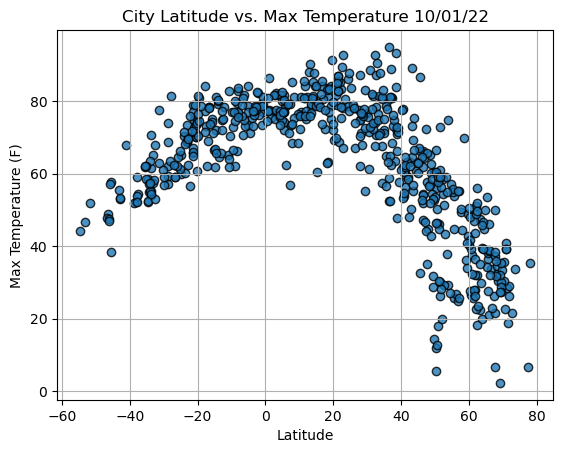

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

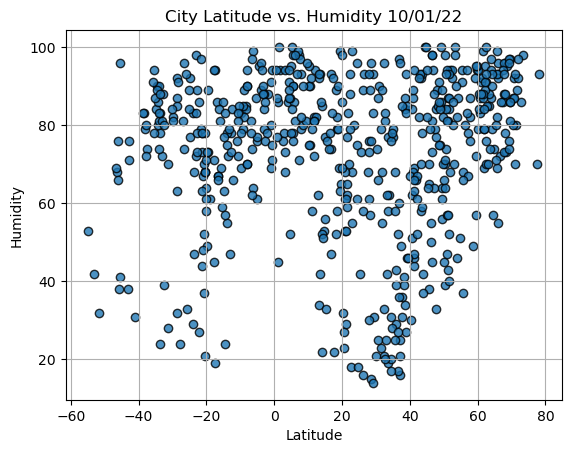

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

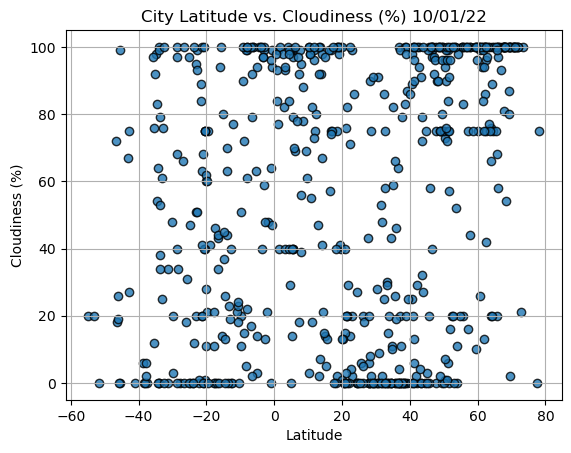

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

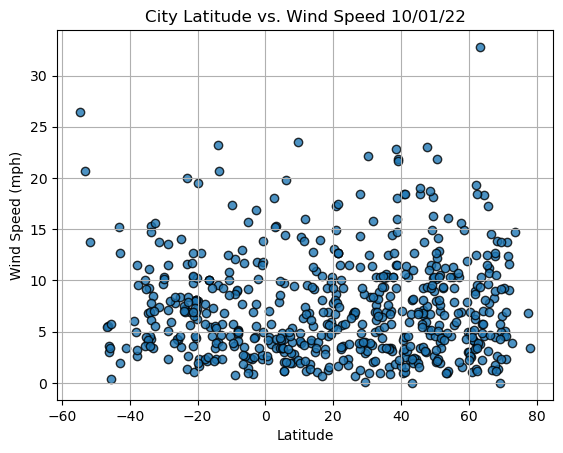

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
   
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Lat                       19.7297
Lng                       -155.09
Max Temp                    91.27
Humidity                       65
Cloudiness                     40
Wind Speed                  10.36
Country                        US
Date          2022-10-01 22:15:50
Name: 13, dtype: object